In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
class_labels = []
file_name = 'coco.names'
with open(file_name, 'rt') as fpt:
    class_labels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(len(class_labels))

80


In [6]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

<dnn_Model 0000021E7CCA61F0>

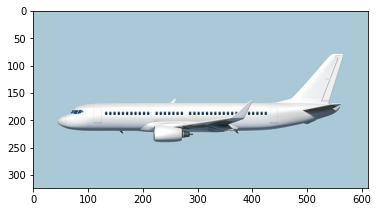

In [7]:
img = cv2.imread('airplane.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
class_index, confidence, box = model.detect(img, confThreshold = 0.5)
print(confidence)

[[0.8807611]]


In [9]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for class_ind, conf, boxes in zip(class_index.flatten(), confidence.flatten(), box):
    cv2.rectangle(img, boxes, (0, 255, 0), 2)
    cv2.putText(img, class_labels [class_ind - 1], (boxes [0] - 10, boxes [1] - 10), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)

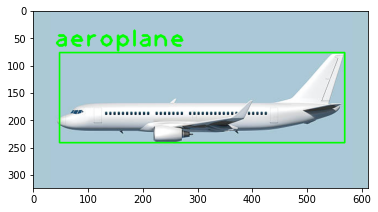

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
capture = cv2.VideoCapture('video.mp4')

while True:
    ret, frame = capture.read()
    class_index, confidence, box = model.detect(frame, confThreshold = 0.55)
    if (len(class_index) != 0):
        for class_ind, conf, boxes in zip(class_index.flatten(), confidence.flatten(), box):
            if (class_ind <= 80):
                cv2.rectangle(frame, boxes, (0, 255, 0), 2)
                cv2.putText(frame, class_labels[class_ind - 1], (boxes[0] - 10, boxes[1] - 10), font, fontScale = font_scale, color = (0, 255, 0))
    cv2.imshow('Object detection', frame)
    
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord("q"):
        break
capture.release()
cv2.destroyAllWindows()
print('Stopping')

Stopping
